In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# create a synthetic datapoints
from sklearn.datasets import make_classification



n_clusters_per_class: This parameter controls the number of distinct clusters within each class. In other words, it determines how well-separated the data points within a class are.


n_clusters_per_class = 1:

This setting creates a single, compact cluster within each class. This means that the data points in each class are tightly grouped together, with minimal overlap between the two classes.
This can be useful for scenarios where you want to clearly separate the classes and avoid ambiguity in classification tasks.


n_clusters_per_class = 2:

This setting creates two distinct clusters within each class. The data points within each class are now divided into two separate groups, potentially with some overlap between the clusters.
This can be useful for scenarios where you want to model more complex relationships within each class or when you suspect that there might be natural subgroups within the classes.


n_clusters_per_class = 3:

This setting creates three distinct clusters within each class, further subdividing the data points.
This can be useful for even more complex scenarios where there are multiple natural subgroups within each class, or when you want to model highly non-linear relationships.

In [10]:
# redundant parameter dalo wrna error ayegi, try and see , you wll know yourself
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

n_redundant=0 is typically the best choice for most use cases, as it avoids the issues associated with redundant features.
If you have a specific reason to include redundant features (e.g., for testing purposes or to simulate real-world data with correlated features), you can experiment with different values for n_redundant. However, be aware of the potential drawbacks.









In [11]:
X

array([[ 0.9180602 , -1.9657903 ],
       [-1.70531319,  0.51417543],
       [ 1.05743118, -0.51670154],
       ...,
       [ 0.74843205, -1.01622827],
       [-1.31253166,  0.98659457],
       [-0.91943075,  1.40042052]])

In [22]:
X = pd.DataFrame(X)

<Axes: xlabel='0', ylabel='1'>

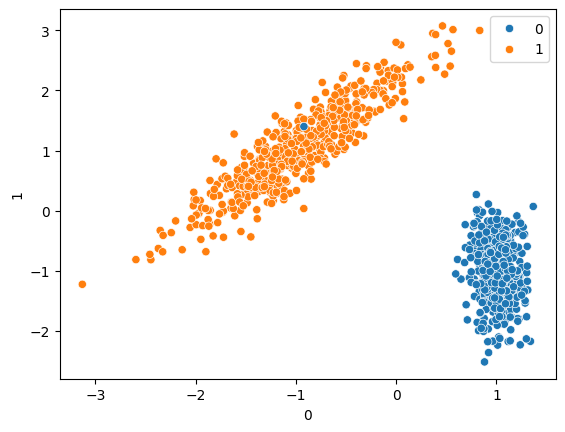

In [25]:
sns.scatterplot(x=X[0],y=X[1],hue=y)

we can clearly see that datapoijts are seperable , so we can easily find the best fit line with SVC, that is linear suport vector classifier

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [27]:
from sklearn.svm import SVC

In [28]:
# we can clearly see that points are easily seperable, so we use linear kernel here
svc = SVC(kernel='linear')

In [30]:
svc.fit(X_train,y_train)


SVC(kernel='linear')

In [32]:
y_pred = svc.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix


In [50]:
classification_report(y_test,y_pred)
# such good accuracy coz all datapoints are very clearly seperable

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       120\n           1       1.00      1.00      1.00       130\n\n    accuracy                           1.00       250\n   macro avg       1.00      1.00      1.00       250\nweighted avg       1.00      1.00      1.00       250\n'

In [49]:
confusion_matrix(y_test,y_pred)

array([[120,   0],
       [  0, 130]])

In [51]:
# now if we use n_cluser = 2
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [53]:
X= pd.DataFrame(X)

<Axes: xlabel='0', ylabel='1'>

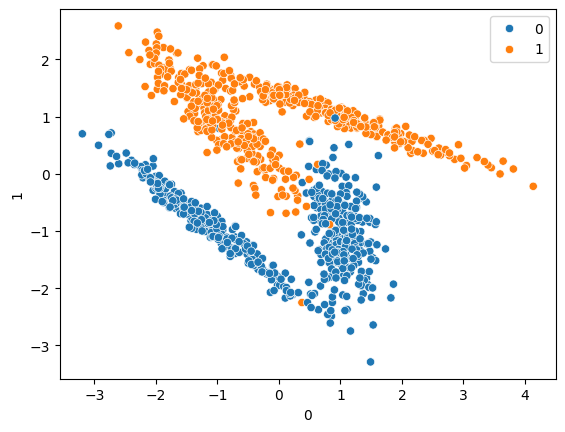

In [54]:
sns.scatterplot(x=X[0],y=X[1],hue=y)

we can see here that pooints are overlapping coz we increased no of clusters, in this case accuracy wont be 100% with linear svc cox datapoints not clearly seperable

In [55]:
rbf = SVC(kernel='rbf')

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [57]:
rbf.fit(X_train,y_train)

SVC()

In [58]:
y_pred = rbf.predict(X_test)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix


In [72]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.91      0.99      0.95       116
           1       0.99      0.92      0.95       134

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.96      0.95      0.95       250



here we see accuracy isnt 100%

In [63]:
poly = SVC(kernel = 'poly')


In [64]:
poly.fit(X_train,y_train)

SVC(kernel='poly')

In [65]:
y_pred = poly.predict(X_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       116
           1       0.99      0.92      0.95       134

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.96      0.95      0.95       250

[[115   1]
 [ 11 123]]


# hyperparameter tuning

GAMMA PARAMETER; 


The gamma parameter in the Support Vector Classifier (SVC) in scikit-learn is used to control the influence of individual data points on the decision boundary.

Here's a breakdown of its function:

Kernel Trick: In SVC, the kernel function is used to map the data into a higher-dimensional space where it might be easier to separate the classes.


Gamma's Role: gamma controls the curvature or flexibility of the decision boundary in this higher-dimensional space.


Higher Gamma:
Creates a narrower decision boundary, which can lead to overfitting if the data is noisy.
Each data point has a more significant influence on the boundary.


Lower Gamma:
Creates a wider decision boundary, which can lead to underfitting if the data is not well-separated.
Each data point has a less significant influence on the boundary.


Choosing the Right Gamma:

Grid Search: Often, the best gamma value is determined using techniques like grid search or random search, where you experiment with different values and evaluate the model's performance.


Data Characteristics:
For noisy data, a lower gamma might be better to avoid overfitting.
For well-separated data, a higher gamma might be suitable to capture the decision boundary more accurately.


In essence, gamma balances the trade-off between model complexity and generalization ability. By understanding its role, you can effectively tune your SVC model for different datasets and tasks.

In [74]:
#gridsearchCV
from sklearn.model_selection import GridSearchCV

# we only using rbf kernel here coz its giving good accuracy according this data,altho the accuracy is almost same but you can choose more kernel options too if u like

param = {'C':[0.1,1,10,100,1000],
         'gamma':[1,0.1,0.01,0.001],
         'kernel': ['rbf']}

In [76]:
grid=GridSearchCV(SVC(),param_grid = param,refit=True,cv=5,verbose=3)

In [77]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.947 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [78]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [80]:
y_pred = grid.predict(X_test)

In [82]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       124
           1       1.00      0.98      0.99       126

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



In [83]:
print(confusion_matrix(y_pred,y_test))

[[124   0]
 [  2 124]]
